In [1]:
import os
import joblib
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

file_path = r"C:\BDSE33-Final_topic\CSV\飲料店總表0307final01_補上人氣_補值_hg.csv"

dataset = pd.read_csv(file_path, encoding='ANSI')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           4742 non-null   object 
 1   star                           4742 non-null   float64
 2   comment                        4742 non-null   int64  
 3   class                          4742 non-null   object 
 4   address                        4742 non-null   object 
 5   latitude                       4742 non-null   float64
 6   longitude                      4742 non-null   float64
 7   school_counts                  4742 non-null   int64  
 8   drink_counts                   4742 non-null   int64  
 9   train_counts                   4742 non-null   int64  
 10  youbike_counts                 4742 non-null   int64  
 11  bus_counts                     4742 non-null   int64  
 12  park_counts                    4742 non-null   i

In [12]:
import pandas as pd


def analyze_nan_and_zero_values(
    data, threshold, sort_column="零值+NAN佔比 (%)", ascending=False
):
    """
    檢查0值和 nan 的數量
    threshold 為 百分比，例threshold=20，會回傳 零值+NAN佔比 (%) 大於20% 的
    當 threshold = 0 會回傳全部
    """

    # 如果輸入是文件路徑，讀取CSV文件並轉換成Pandas DataFrame

    if isinstance(data, str):

        file_source_pd = pd.read_csv(data)

    # 如果輸入是Pandas DataFrame，直接使用它

    elif isinstance(data, pd.DataFrame):

        file_source_pd = data

    else:

        raise ValueError(
            "Invalid input type. Input must be either file path or Pandas DataFrame."
        )

    # 計算這個範圍內每一欄的空白值(NaN)數量

    nan_values_per_column_in_range = file_source_pd.isnull().sum(axis=0)

    # 計算每個欄位的總數據量

    total_data_per_column = len(file_source_pd)

    # 計算每個欄位的空白值(NaN)佔比

    nan_percentage_per_column = (
        nan_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算這個範圍內每一欄的零值數量

    zero_values_per_column_in_range = (file_source_pd == 0).sum(axis=0)

    # 計算每個欄位的零值佔比

    zero_percentage_per_column = (
        zero_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算每個欄位的零值和NaN值的總數

    total_zero_and_nan_per_column = (
        zero_values_per_column_in_range + nan_values_per_column_in_range
    )

    # 計算每個欄位的零值和NaN值總數的佔比

    total_zero_and_nan_percentage_per_column = (
        total_zero_and_nan_per_column / total_data_per_column
    ) * 100

    # 將結果轉換為 DataFrame

    values_df = pd.DataFrame(
        {
            "欄位名稱": nan_values_per_column_in_range.index,
            "零值+NAN佔比 (%)": total_zero_and_nan_percentage_per_column.values.round(
                2
            ),
            "空白值(NaN)數量": nan_values_per_column_in_range.values,
            "空白值(NaN)佔比 (%)": nan_percentage_per_column.values.round(2),
            "零值數量": zero_values_per_column_in_range.values,
            "零值佔比 (%)": zero_percentage_per_column.values.round(2),
        }
    )

    # 將 DataFrame 存儲到 CSV 檔案中
    values_df.to_csv("零值與空白值統計.csv", index=False, encoding="utf-8-sig")

    # 如果 threshold 等於 0，則返回所有欄位
    if threshold == 0:
        return values_df

    # 篩選出 '零值+NAN佔比 (%)' 大於指定閾值的欄位

    filtered_values_df = values_df[values_df["零值+NAN佔比 (%)"] > threshold]

    # 根據指定的列進行排序

    sorted_values_df = filtered_values_df.sort_values(
        by=sort_column, ascending=ascending
    )

    return sorted_values_df


analyze_nan_and_zero_values(dataset, 0, sort_column="零值+NAN佔比 (%)", ascending=False)

,欄位名稱,零值+NAN佔比 (%),空白值(NaN)數量,空白值(NaN)佔比 (%),零值數量,零值佔比 (%)
0,name,0.00,0,0.00,0,0.00
1,star,4.53,0,0.00,215,4.53
2,comment,4.53,0,0.00,215,4.53
3,class,0.00,0,0.00,0,0.00
4,address,0.00,0,0.00,0,0.00
5,latitude,0.00,0,0.00,0,0.00
6,longitude,0.00,0,0.00,0,0.00
7,school_counts,2.45,0,0.00,116,2.45
8,drink_counts,0.00,0,0.00,0,0.00
9,train_counts,83.99,0,0.00,3983,83.99


In [2]:
selected_data = dataset[
    [
        "star",
        "school_counts",
        "drink_counts",
        "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        "people_flow_mean",
        "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
    ]
]


In [3]:
selected_data_heat_map = dataset[
    [
        # "star",
        "school_counts",
        "drink_counts",
        # "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        # "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        # "people_flow_mean",
        # "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        # "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
    ]
]

C:\Users\student\AppData\Local\Temp\ipykernel_5456\3021023438.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Y_classification_pd.groupby("category")["value"]


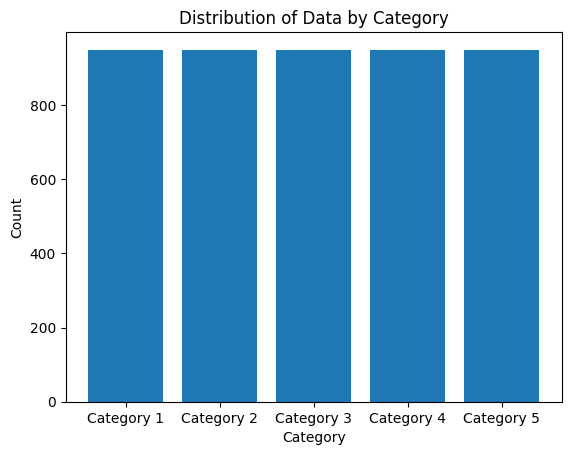

C:\Users\student\AppData\Local\Temp\ipykernel_5456\3021023438.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["popularity_category"] = pd.cut(
C:\Users\student\AppData\Local\Temp\ipykernel_5456\3021023438.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["popularity_category"] = selected_data["popularity_category"].fillna(5)


(popularity_category
 1    949
 2    948
 3    948
 4    948
 5    949
 Name: count, dtype: int64,
      category         最小值           最大值   數量
 0  Category 1    0.000000      3.254760  949
 1  Category 2    3.295444     85.328799  948
 2  Category 3   85.486327    313.433695  948
 3  Category 4  313.641095    861.541994  948
 4  Category 5  861.621606  14379.516990  949)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假設的 selected_data 和 'popularity' 欄位數據
np.random.seed(0)

# 使用 pd.qcut 進行分類
Y_classification_pd = pd.DataFrame({"value": selected_data["popularity"]})
Y_classification_pd["category"] = pd.qcut(
    Y_classification_pd["value"],
    q=5,
    labels=["Category 1", "Category 2", "Category 3", "Category 4", "Category 5"],
)

# 分組並獲得統計信息
summary_df = (
    Y_classification_pd.groupby("category")["value"]
    .agg([("最小值", "min"), ("最大值", "max"), ("數量", "size")])
    .reset_index()
)

# 繪製數據分布
category_counts = Y_classification_pd["category"].value_counts().sort_index()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Data by Category")
plt.show()

# 建立分類
value_category_ranges = [
    summary_df.loc[0, "最小值"],  # 第一類別的最小值
    summary_df.loc[1, "最小值"],  # 第二類別的最小值
    summary_df.loc[2, "最小值"],  # 第三類別的最小值
    summary_df.loc[3, "最小值"],  # 第四類別的最小值
    summary_df.loc[4, "最小值"],  # 第五類別的最小值
    summary_df.loc[4, "最大值"],  # 第五類別的最大值
]

# 使用 pd.cut 根據新的範圍劃分 'popularity' 欄位
selected_data["popularity_category"] = pd.cut(
    selected_data["popularity"],
    bins=value_category_ranges,
    right=False,  # 包括左邊界，排除右邊界
    labels=[1, 2, 3, 4, 5],
)

# 将超出范围的值设为最大范围
selected_data["popularity_category"] = selected_data["popularity_category"].fillna(5)

# selected_data['popularity_category'] = selected_data['popularity_category'].astype(int)

# 打印新的分類結果和每類的數量
selected_data["popularity_category"].value_counts().sort_index(), summary_df



In [19]:
# 將 'popularity_category' 列的數據類型更改為整數
selected_data['popularity_category'] = selected_data['popularity_category'].astype(int)


# 設定模型輸入x
X = selected_data.drop(columns=["popularity", "popularity_category"])
y = selected_data[["popularity_category"]]

# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

C:\Users\student\AppData\Local\Temp\ipykernel_5456\3090024940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['popularity_category'] = selected_data['popularity_category'].astype(int)


In [18]:
selected_data

,star,school_counts,drink_counts,train_counts,youbike_counts,bus_counts,park_counts,night_market_counts,sports_facilities_counts,mrt_counts,...,hospital_counts,salary_income_median,people_flow_mean,knock_down_price_mean,weekend_open,road_area_ratio,age,weekday_working_hours_average,popularity,popularity_category
0,3.6,13,89,0,55,23,17,1,24,2,...,0,692,12983.248690,4410,2,0.242220,42.114756,1.0,45.544210,2
1,4.9,6,77,0,30,21,22,0,7,3,...,1,679,5710.842282,2799,0,0.219356,50.603125,1.0,47.853862,2
2,4.4,6,116,0,27,29,17,1,6,2,...,1,483,10865.615870,32985,2,0.062639,42.114756,3.0,1464.937989,5
3,5.0,11,170,1,44,74,16,0,5,5,...,3,819,3440.511710,3775,0,0.234339,42.114756,1.8,58.275651,2
4,3.9,12,103,0,38,57,17,3,10,3,...,1,469,2195.838626,2551,0,0.222440,42.114756,1.6,32.447733,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,4.6,12,104,0,47,30,16,1,24,4,...,1,902,12983.248690,4410,0,0.242220,42.114756,11.5,227.721050,3
4738,4.7,12,104,0,47,30,16,1,24,4,...,1,902,12983.248690,4410,0,0.242220,42.114756,11.5,464.550942,4
4739,2.5,8,18,0,23,5,16,0,5,0,...,1,1037,11638.892680,2967,0,0.111398,41.417793,10.0,11.313530,2
4740,4.2,11,96,1,39,61,21,3,2,1,...,3,489,4589.894305,12843,0,0.197613,44.497559,7.0,331.563444,4


In [6]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.4 MB 469.7 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 804.6 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.2 MB/s eta 0:00:02
   ------------ --------------------------- 0.5/1.4 MB 1.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00
Note: you may need to resta


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.ensemble import BaggingClassifier
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 模型檔案位置
model_paths = [
    "C:/BDSE33-Final_topic/python/機械學習/模型/AdaBoost_model_best.joblib",
    "C:/BDSE33-Final_topic/python/機械學習/模型/Bayesion_classifier_model_best.joblib",
    "C:/BDSE33-Final_topic/python/機械學習/模型/best_randomforest_model.joblib",
    "C:/BDSE33-Final_topic/python/機械學習/模型/LogisticRegression_model_best.joblib",
    "C:/BDSE33-Final_topic/python/機械學習/模型/MultinomialNB_model_best.joblib",
    "C:/BDSE33-Final_topic/python/機械學習/模型/SVM_svc_best.joblib",
]
# 載入模型
models = [joblib.load(model_path) for model_path in model_paths]

bagging_model = BaggingClassifier(n_estimators=len(models), random_state=42)

# 逐一使用每個模型並顯示準確率
for idx, model in enumerate(models):
    # Set the base_estimator for the current iteration
    bagging_model.base_estimator_ = model
    
    # Fit the Bagging model
    bagging_model.fit(X_train, y_train)

    # Predict
    y_pred = bagging_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Bagging 模型 {idx + 1} 的準確率:", accuracy)

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging 模型 1 的準確率: 0.4701335207308503
Bagging 模型 2 的準確率: 0.4701335207308503


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging 模型 3 的準確率: 0.4701335207308503
Bagging 模型 4 的準確率: 0.4701335207308503


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging 模型 5 的準確率: 0.4701335207308503
Bagging 模型 6 的準確率: 0.4701335207308503


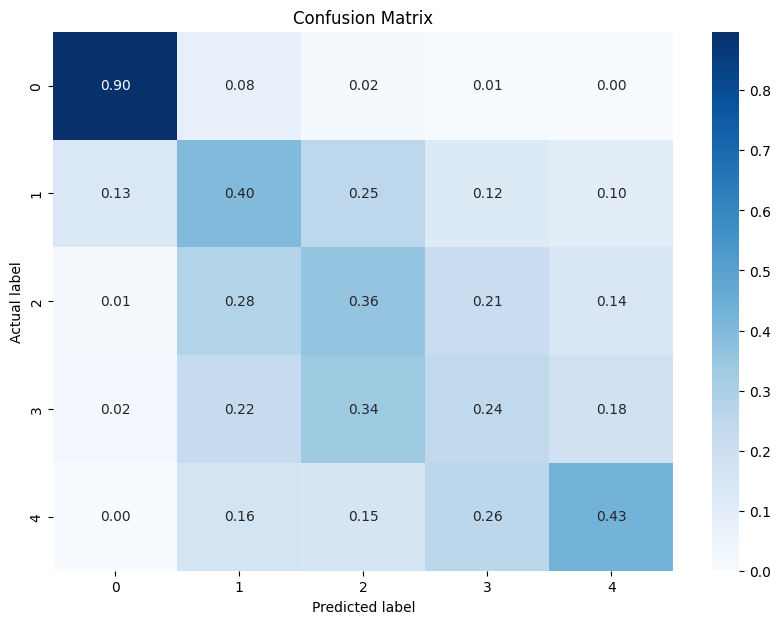

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 生成混淆矩陣
cm = confusion_matrix(y_test, y_pred)


# 轉換為比例
cm_ratio = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# 使用Seaborn畫出混淆矩陣的熱力圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ratio, annot=True, fmt=".2f", cmap="Blues")  # fmt='.2f' 指定顯示兩位小數
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()